# PART 3 - TIME SERIES DATA

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [90]:
# File path for the cleaned CSV file
file_path = '../data/a1_worksheet_cleaned.csv'

df = pd.read_csv(file_path) 


In [91]:
df.shape

(101, 4)

In [92]:
df.head()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,181160.0,3.68,4.06
1,1901,184975.0,4.88,-0.30
2,1902,187757.0,5.15,0.00
3,1903,186016.0,5.60,1.10
4,1904,188156.0,6.91,-0.40


In [93]:
df.tail()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
96,1996,1243709.0,8.10,2.40
97,1997,1282602.0,6.97,1.82
98,1998,1323527.0,6.26,1.56
99,1999,1366983.0,5.98,1.33
100,2000,1418176.0,5.46,0.80


### Visualizing Time Series Data


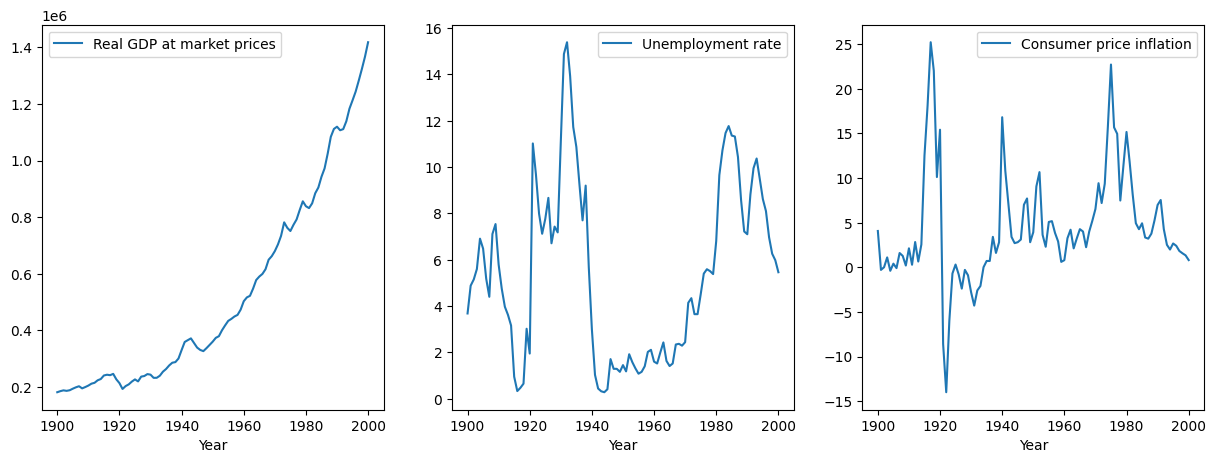

In [ ]:
# plot the data to see the trends
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df.plot(x='Year', y='Real GDP at market prices', ax=ax[0])
df.plot(x='Year', y='Unemployment rate', ax=ax[1])
df.plot(x='Year', y='Consumer price inflation', ax=ax[2])
plt.show()



### 24. Define strict and weak stationarity.

According to the lecture 6 (Time Series 2), a time series $\{x_t\}$ is *strictly stationary* if the joint distribution of 
$(x_{t_1}, x_{t_2}, \ldots, x_{t_m})$ is the same as the joint distribution of 
$(x_{t_1+h}, x_{t_2+h}, \ldots, x_{t_m+h})$ for any collection of time indices $t_1 \leq t_2 \leq \ldots \leq t_m$ and for all $h \geq 1$. This implies that the statistical properties of the series are invariant under time shifts.

On the other hand, a stochastic process $\{x_t\}$ is *weakly stationary* if:
1. $\mathbb{E}[x_t]$ is constant over time.
2. $\text{Var}(x_t)$ is constant over time.
3. $\text{Cov}(x_t, x_{t+h})$ does not depend on $t$, only on $h$.

### 25. Explain ergodicity and state the ergodic theorem. Illustrate with an example.

*Ergodicity* is the property of a stochastic process where the statistical properties estimated over a single realization are the same as those estimated over the ensemble. It is like the process "forgets" its initial conditions as time progresses. The two conditions for ergodicity to hold are:
- The process is strictly stationnary
- The auto-correlation of order $k$ tends to 0 as $k$ approaches infinity.

*Ergodicity Theorem*: If a process $\{y_t\}$ is strictly stationary and ergodic, and $E(y_t) < \infty$, then the time average of the process converges to the ensemble mean as the number of observations $T$ tends to infinity.

*Example*:

### 26. Why do we need both stationarity and ergodicity?

We need both *stationarity* and *ergodicity* because:
- *Stationarity* ensures that the statistical properties of the process, like mean, variance, and covariance, remain constant over time, making the analysis and modeling consistent.
- *Ergodicity* ensures that the time averages calculated from a single realization of the process are representative of the ensemble averages. This allows us to estimate the process's characteristics from a single long time series without needing multiple realizations.

### 27. Explain “spurious regression”.

Spurious regression occurs when two or more non-stationary time series are regressed, producing misleadingly high $R^2$ values. It arises from shared trends or stochastic drifts in unrelated variables, rather than a genuine connection. For example, regressing GDP and temperature over time might falsely show a strong relationship because both share upward trends, though they are unrelated.

---

### 28. Make all time series stationary by computing the difference between the original variable and a moving average of order $2 \times 10$. Give the formula for the exact weights.

### 29. Using the original dataset, test the unit root hypothesis for all variables.

### 30. Transform all variables so that they are stationary using either your answers to questions 28 or 29.

### 31. Explain the difference between ACF and PACF.


The *auto-correlation function* (ACF) measures the correlation between a time series $y_t$ and its lagged values $y_{t-k}$. Its formula is given by:

$$
\rho_k = \frac{\text{Cov}(y_t, y_{t-k})}{\text{Var}(y_t)}
$$

And the *partial auto-correlation function* measures the correlation between $y_t$ and $y_{t-k}$ after controlling for the effects of intermediate lags $y_{t-1}, y_{t-2}, \dots, y_{t-(k-1)}$.

In essence, ACF measures total correlation (direct + indirect) at each lag, while PACF isolates the direct correlation for each lag.

---

### 32. Plot and comment on the ACF and PACF of all variables.


### 33. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

The principle of parsimony states that among many model, we should prioritize simpler models that adequatly explain the data, avoiding unnecessary complexity. This aligns with Ockham's razor, which supports parsimony by favoring models with fewer parameters to prevent overfitting.

In model selection, this principle is applied using information criteria like the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Both balance model fit and complexity, with lower values indicating better models. AIC favors models with good fit but avoids overfitting by penalizing extra parameters, while BIC penalizes complexity more strongly, especially for large datasets. These criteria ensure model selection follows Ockham's Razor by promoting simplicity without sacrificing performance.

---

### 34. Explain the problem of auto-correlation of the errors.

*Autocorrelation of errors* occurs when the residuals ($u_t$) in a regression model are correlated with one another across time. This violates the classical OLS assumption that the errors are independently distributed.

---

### 35. Using only stationary variables, run a regression of GDP on `constant`, `unemployment`, and `inflation` and test the hypothesis of no-autocorrelation of errors.

### 36. Regardless of your answer to question 35, correct auto-correlation with GLS. Test again for the presence of auto-correlation. Comment on your results.

### 37. For all variables, construct their lag 1 and lag 2 variables.


### 38. Run a regression of GDP on `constant`, lag 1 `unemployment`, lag 2 `unemployment`, lag 1 `inflation`, and lag 2 `inflation`. What is the number of observations and why?


### 39. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.


### 40. Divide the sample into two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.


### 41. Test the structural breakpoint using a trim ratio of 30% at the 1% level.


### 42. Divide the sample into 3 periods of equal length. Test that the coefficients of the second and the third periods are equal. Formulate the null hypothesis and interpret your results.
